In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#enable Ipython to display matplotlib graphs
%matplotlib inline

In [2]:
NY = pd.read_csv("NewYork.csv")
NY = NY.rename(columns={"New Date": "Old Date"})

In [3]:
NY.columns

Index(['Date', '2020 AQI Value', 'Main Pollutant', 'Site Name', 'Site ID',
       'Source', '20-year High (1980-2019)', '20-year Low (1980-2019)',
       '5-year Median (2015-2019)', 'Old Date'],
      dtype='object')

In [4]:
New_NY = NY.drop(["Site Name", "Site ID", "Source"], axis = 1)
New_NY

,Date,2020 AQI Value,Main Pollutant,20-year High (1980-2019),20-year Low (1980-2019),5-year Median (2015-2019),Old Date
0,1/1/2020,36,PM2.5,119,42,51,1-Jan
1,1/2/2020,56,PM2.5,115,45,63,2-Jan
2,1/3/2020,62,PM2.5,90,43,56,3-Jan
3,1/4/2020,55,PM2.5,95,46,48,4-Jan
4,1/5/2020,37,PM2.5,91,33,48,5-Jan
...,...,...,...,...,...,...,...
107,4/18/2020,33,Ozone,85,24,38,18-Apr
108,4/19/2020,46,Ozone,98,30,39,19-Apr
109,4/20/2020,37,Ozone,77,24,36,20-Apr
110,4/21/2020,35,Ozone,83,32,39,21-Apr


In [5]:
NY.describe()

,2020 AQI Value,20-year High (1980-2019),20-year Low (1980-2019),5-year Median (2015-2019)
count,112.000000,112.000000,112.000000,112.000000
mean,37.875000,90.991071,29.544643,46.214286
std,9.394387,17.119872,7.213461,8.138916
min,19.000000,51.000000,3.000000,31.000000
25%,31.000000,80.750000,25.000000,38.750000
50%,36.000000,89.500000,30.000000,46.000000
75%,43.000000,99.000000,33.000000,53.000000
max,67.000000,144.000000,46.000000,67.000000


In [6]:
NY.dtypes

Date                         object
2020 AQI Value                int64
Main Pollutant               object
Site Name                    object
Site ID                      object
Source                       object
20-year High (1980-2019)      int64
20-year Low (1980-2019)       int64
5-year Median (2015-2019)     int64
Old Date                     object
dtype: object

In [7]:
New_NY = New_NY.rename(columns={"Main Pollutant": "Air Quality Index Totals in 2020"})
New_NY

,Date,2020 AQI Value,Air Quality Index Totals in 2020,20-year High (1980-2019),20-year Low (1980-2019),5-year Median (2015-2019),Old Date
0,1/1/2020,36,PM2.5,119,42,51,1-Jan
1,1/2/2020,56,PM2.5,115,45,63,2-Jan
2,1/3/2020,62,PM2.5,90,43,56,3-Jan
3,1/4/2020,55,PM2.5,95,46,48,4-Jan
4,1/5/2020,37,PM2.5,91,33,48,5-Jan
...,...,...,...,...,...,...,...
107,4/18/2020,33,Ozone,85,24,38,18-Apr
108,4/19/2020,46,Ozone,98,30,39,19-Apr
109,4/20/2020,37,Ozone,77,24,36,20-Apr
110,4/21/2020,35,Ozone,83,32,39,21-Apr


In [8]:
groupby_pollutant = New_NY.groupby(["Air Quality Index Totals in 2020"])
pollutant_type = groupby_pollutant["Air Quality Index Totals in 2020"].count()

avg_2020 = groupby_pollutant["2020 AQI Value"].mean().map("{:.0f}".format)
highest_in_20Y = groupby_pollutant["20-year High (1980-2019)"].max()
lowest_in_20Y = groupby_pollutant["20-year Low (1980-2019)"].min()

highest_in_5Y = groupby_pollutant["5-year Median (2015-2019)"].max()
lowest_in_5y = groupby_pollutant["5-year Median (2015-2019)"].min()

pollutant = pd.DataFrame ({
                                "Air Quality Index Totals in 2020": pollutant_type,
                                "Average in 2020": avg_2020,
                                "Highest in 20 Years": highest_in_20Y,
                                "Lowest in 20 Years": lowest_in_20Y,
                                "Highest in 5 Years": highest_in_5Y,
                                "Lowest in 5 Years": lowest_in_5y
})

pollutant

,Air Quality Index Totals in 2020,Average in 2020,Highest in 20 Years,Lowest in 20 Years,Highest in 5 Years,Lowest in 5 Years
Air Quality Index Totals in 2020,,,,,,
Ozone,61,33,144,19,59,31
PM2.5,51,43,132,3,67,39


In [9]:
print(f"The total Air Quality Index (AQI)/day caused by Ozone in 2020 is {pollutant.iat[0,0]}")
print(f"The total Air Quality Index (AQI)/day caused by PM2.5 in 2020 is {pollutant.iat[1,0]}")
print(f"---------------------------------------------------------------")
print(f"The average Air Quality Index (AQI) caused by Ozone in 2020 is {pollutant.iat[0,1]}")
print(f"The average Air Quality Index (AQI) caused by PM2.5 in 2020 is {pollutant.iat[1,1]}")
print(f"---------------------------------------------------------------")
print(f"The highest Air Quality Index (AQI) caused by Ozone in the last 20 years is {pollutant.iat[0,2]}")
print(f"The highest Air Quality Index (AQI) caused by PM2.5 in the last 20 years is {pollutant.iat[1,2]}")
print(f"---------------------------------------------------------------")
print(f"The lowest Air Quality Index (AQI) caused by Ozone in the last 20 years is {pollutant.iat[0,3]}")
print(f"The lowest Air Quality Index (AQI) caused by PM2.5 in the last 20 years is {pollutant.iat[1,3]}")
print(f"---------------------------------------------------------------")
print(f"The highest Air Quality Index (AQI) caused by Ozone in the last 5 years is {pollutant.iat[0,4]}")
print(f"The highest Air Quality Index (AQI) caused by PM2.5 in the last 5 years is {pollutant.iat[1,4]}")
print(f"---------------------------------------------------------------")
print(f"The lowest Air Quality Index (AQI) caused by Ozone in the last 5 years is {pollutant.iat[0,5]}")
print(f"The lowest Air Quality Index (AQI) caused by PM2.5 in the last 5 years is {pollutant.iat[1,5]}")


The total Air Quality Index (AQI)/day caused by Ozone in 2020 is 61
The total Air Quality Index (AQI)/day caused by PM2.5 in 2020 is 51
---------------------------------------------------------------
The average Air Quality Index (AQI) caused by Ozone in 2020 is 33
The average Air Quality Index (AQI) caused by PM2.5 in 2020 is 43
---------------------------------------------------------------
The highest Air Quality Index (AQI) caused by Ozone in the last 20 years is 144
The highest Air Quality Index (AQI) caused by PM2.5 in the last 20 years is 132
---------------------------------------------------------------
The lowest Air Quality Index (AQI) caused by Ozone in the last 20 years is 19
The lowest Air Quality Index (AQI) caused by PM2.5 in the last 20 years is 3
---------------------------------------------------------------
The highest Air Quality Index (AQI) caused by Ozone in the last 5 years is 59
The highest Air Quality Index (AQI) caused by PM2.5 in the last 5 years is 67
-----

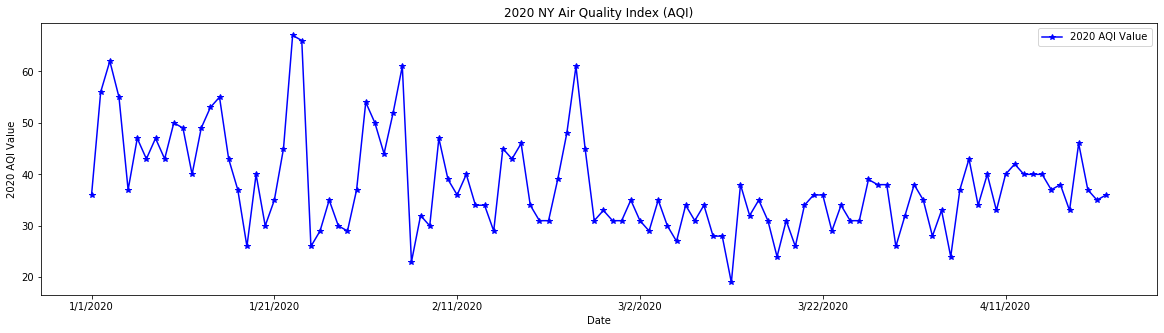

In [10]:
New_NY.plot(kind= "line", x='Date', y='2020 AQI Value', marker = "*", color = "blue", \
                figsize=(20,5), title= "2020 NY Air Quality Index (AQI)")
plt.ylabel("2020 AQI Value")
plt.savefig("Png/2020 (AQI) Level.png")
plt.show()

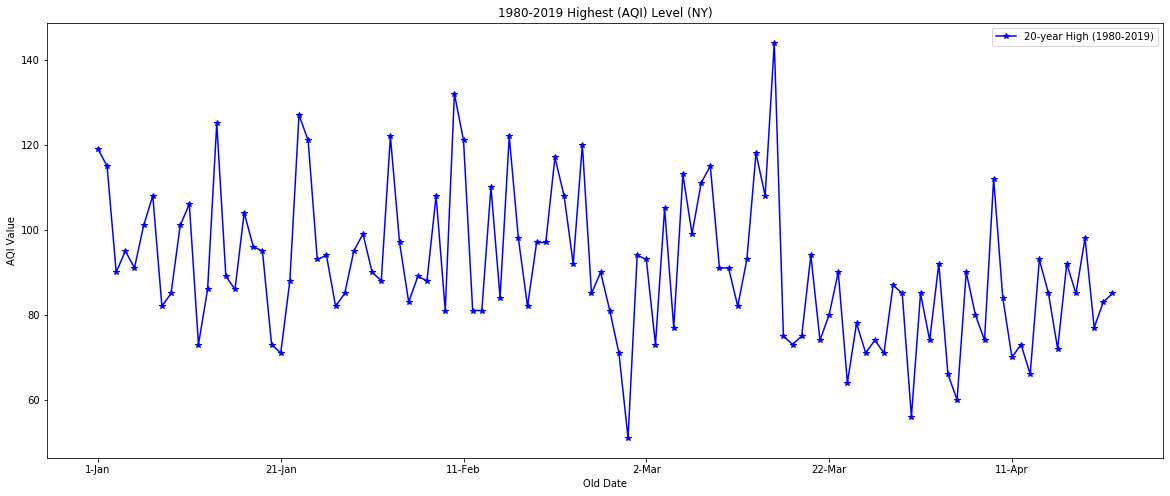

In [11]:
New_NY.plot(kind= "line",x= 'Old Date', y='20-year High (1980-2019)', marker = "*", color = "blue", \
                figsize=(20,8),use_index=True, title= "1980-2019 Highest (AQI) Level (NY)")
plt.ylabel("AQI Value")
plt.savefig("Png/1980-2019 Highest (AQI) Level.png")
plt.show()

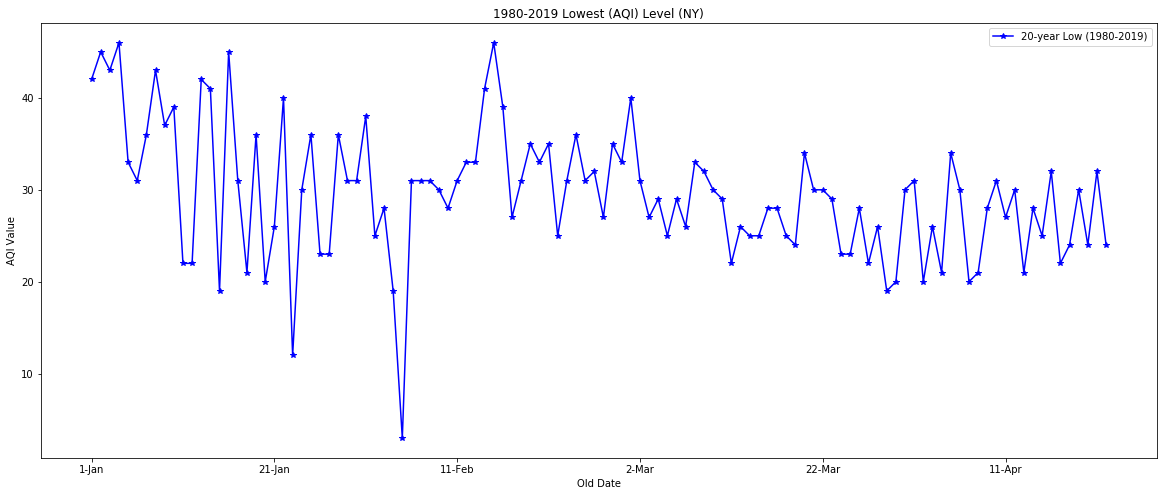

In [12]:
New_NY.plot(kind= "line", x='Old Date', y='20-year Low (1980-2019)', marker = "*", color = "blue", \
                figsize=(20,8), title= "1980-2019 Lowest (AQI) Level (NY)")
plt.ylabel("AQI Value")
plt.savefig("Png/1980-2019 Lowest (AQI) Level.png")
plt.show()

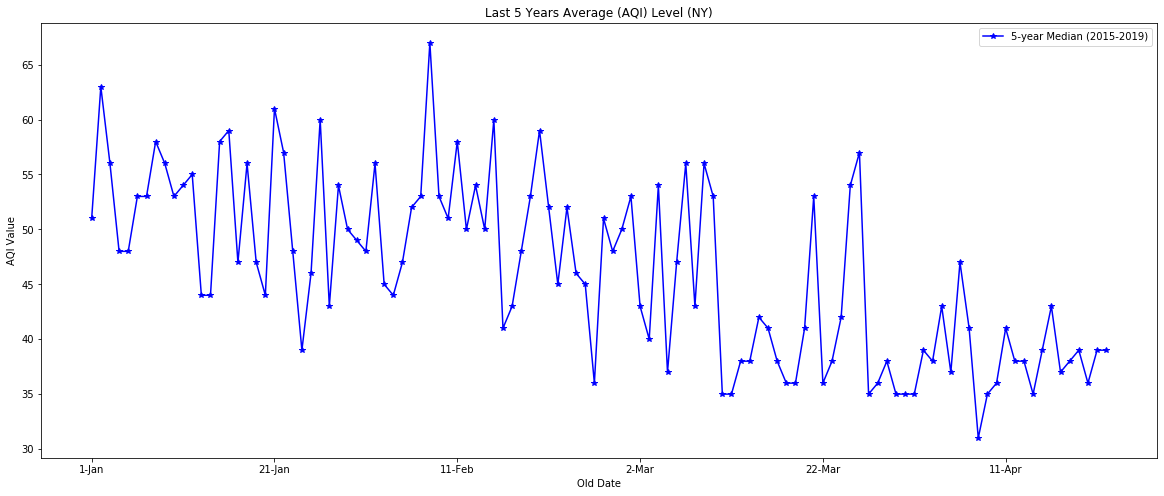

In [13]:
New_NY.plot(kind= "line", x='Old Date', y='5-year Median (2015-2019)',marker = "*", color = "blue", \
                figsize=(20,8), title= "Last 5 Years Average (AQI) Level (NY)")
plt.ylabel("AQI Value")
plt.savefig("Png/5_years_avg.png")
plt.show()